In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from dateutil import relativedelta

import warnings
warnings.filterwarnings("ignore")

In [30]:
data = pd.read_csv('Toy_data.csv')
target = pd.read_csv('Toy_data_target.csv')

In [3]:
data = data.rename(columns = {'Unnamed: 0':'Date'})
data = data.set_index('Date')


In [4]:
data = data.drop('USYC2Y10 Index', axis = 1)


In [5]:
data = data['2005-01-01': '2010-12-31']

In [6]:
start = '2007-01-01'
end = '2010-12-31'
d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
3 years


In [7]:
number_of_years = delta.years

In [8]:
days = (d2 - d1).days
days

1460

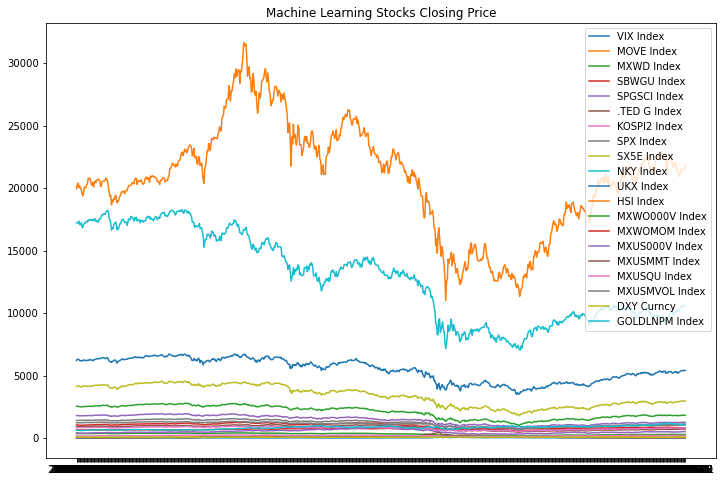

In [9]:
plt.figure(figsize=(12,8))
plt.plot(data)
plt.title('Machine Learning Stocks Closing Price')
plt.legend(labels=data.columns)

In [10]:
# Normalize the data
normalize = (data - data.min())/ (data.max() - data.min())

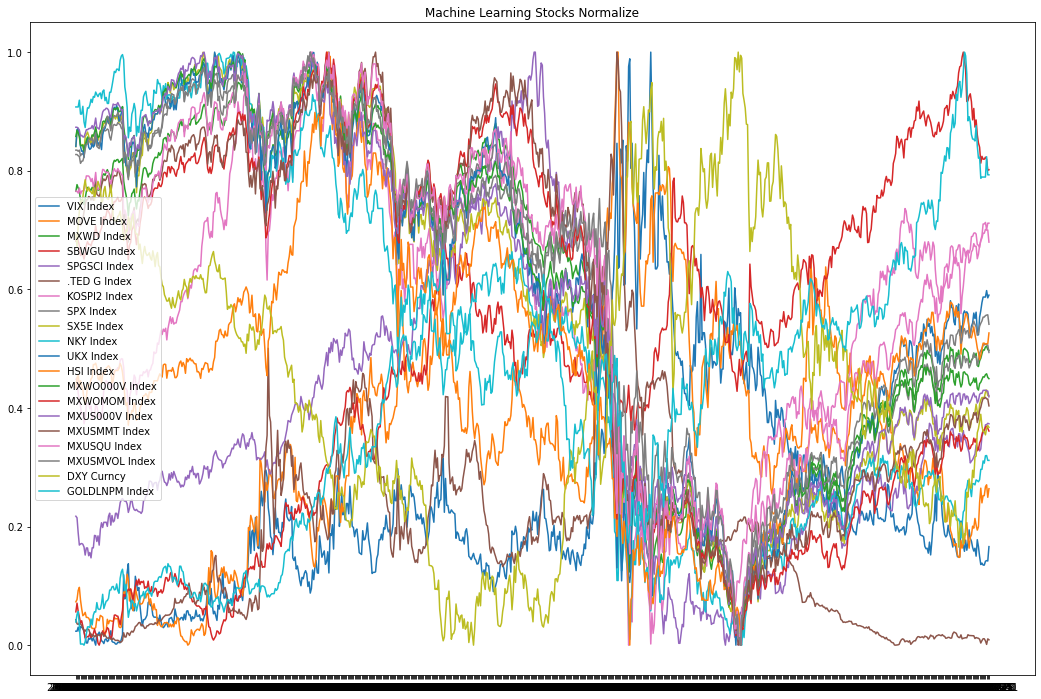

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Machine Learning Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = data.pct_change().dropna()

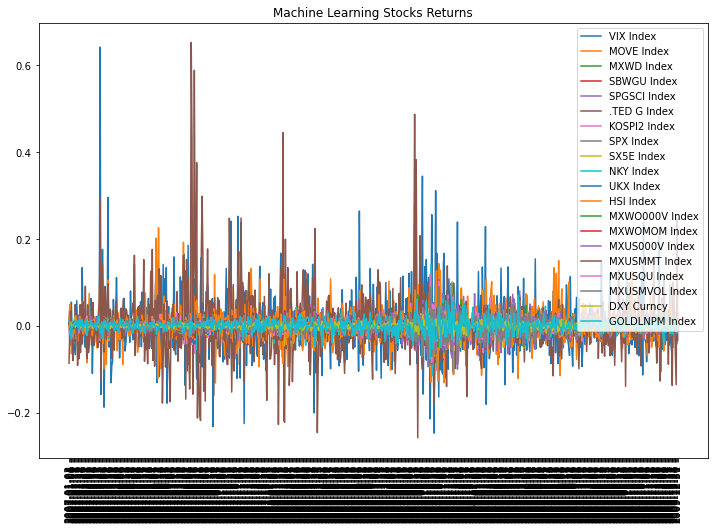

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Machine Learning Stocks Returns')
plt.xticks(rotation =90)
plt.legend(labels=stock_rets.columns)

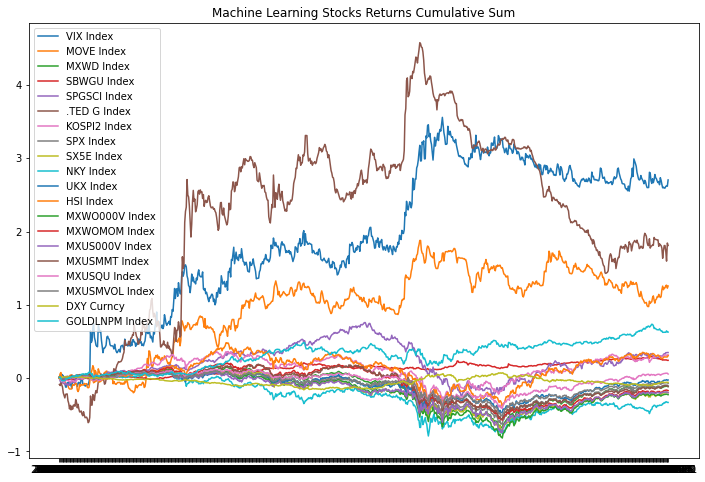

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Machine Learning Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

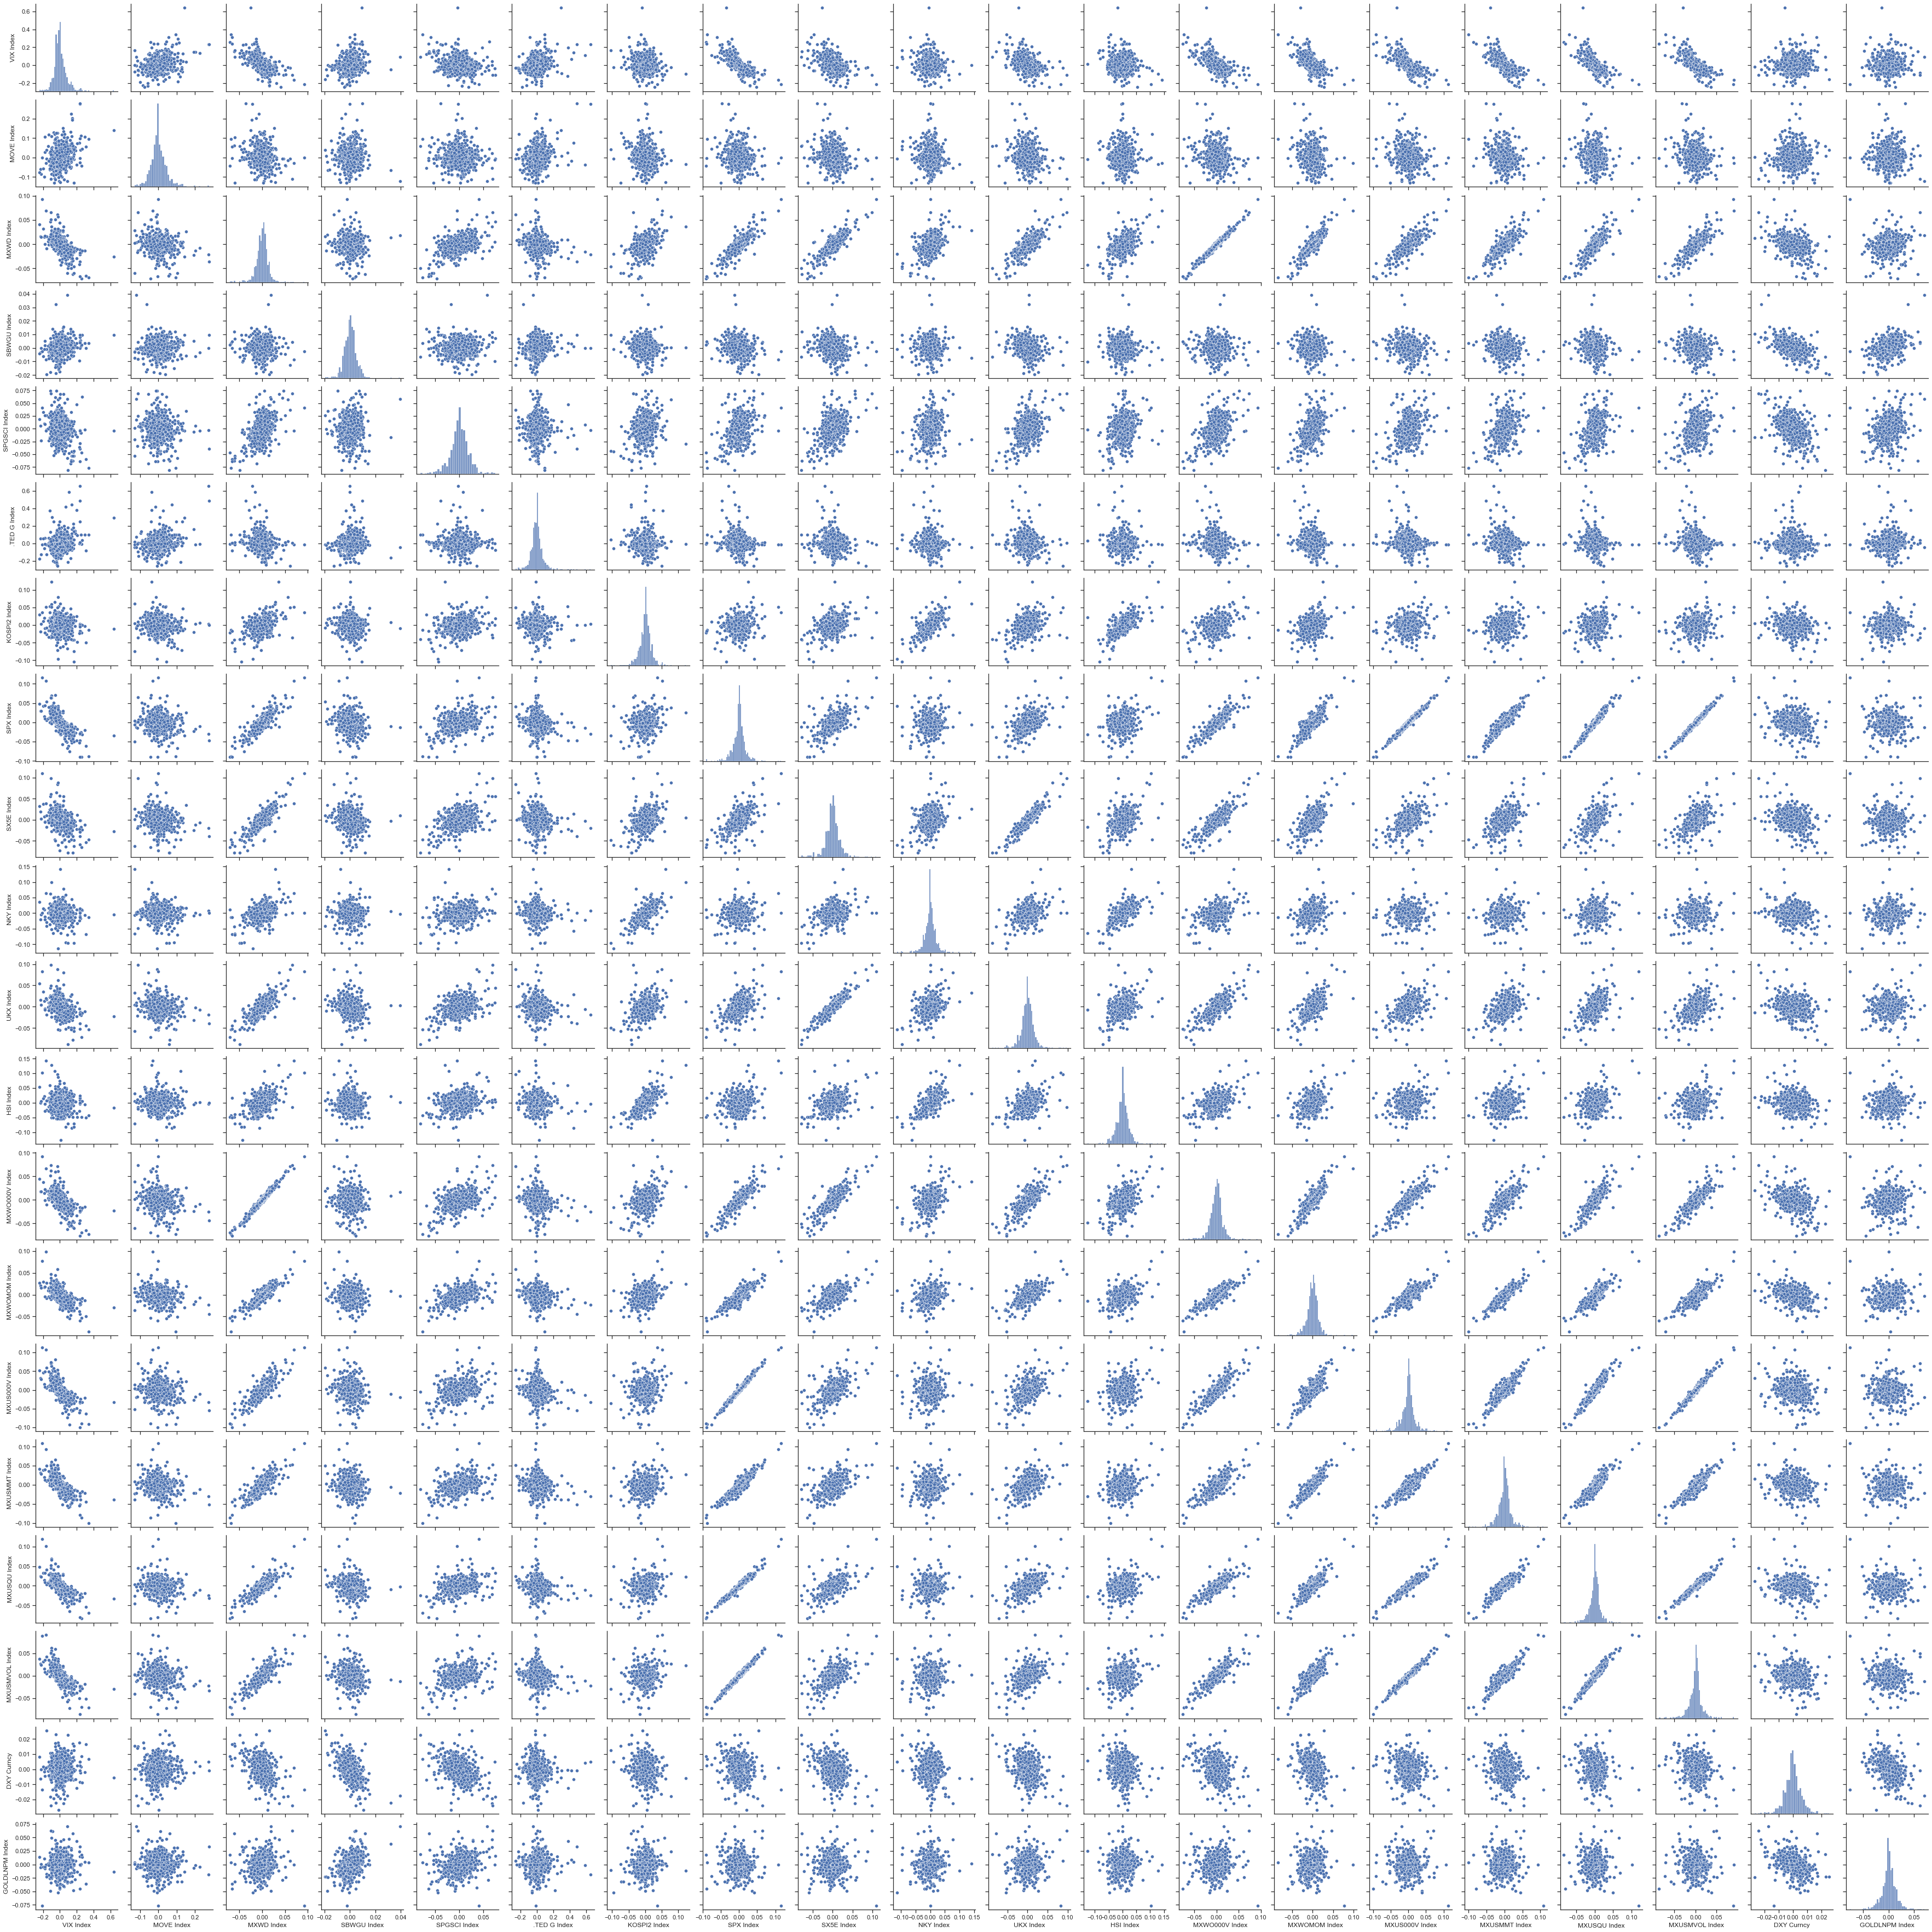

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

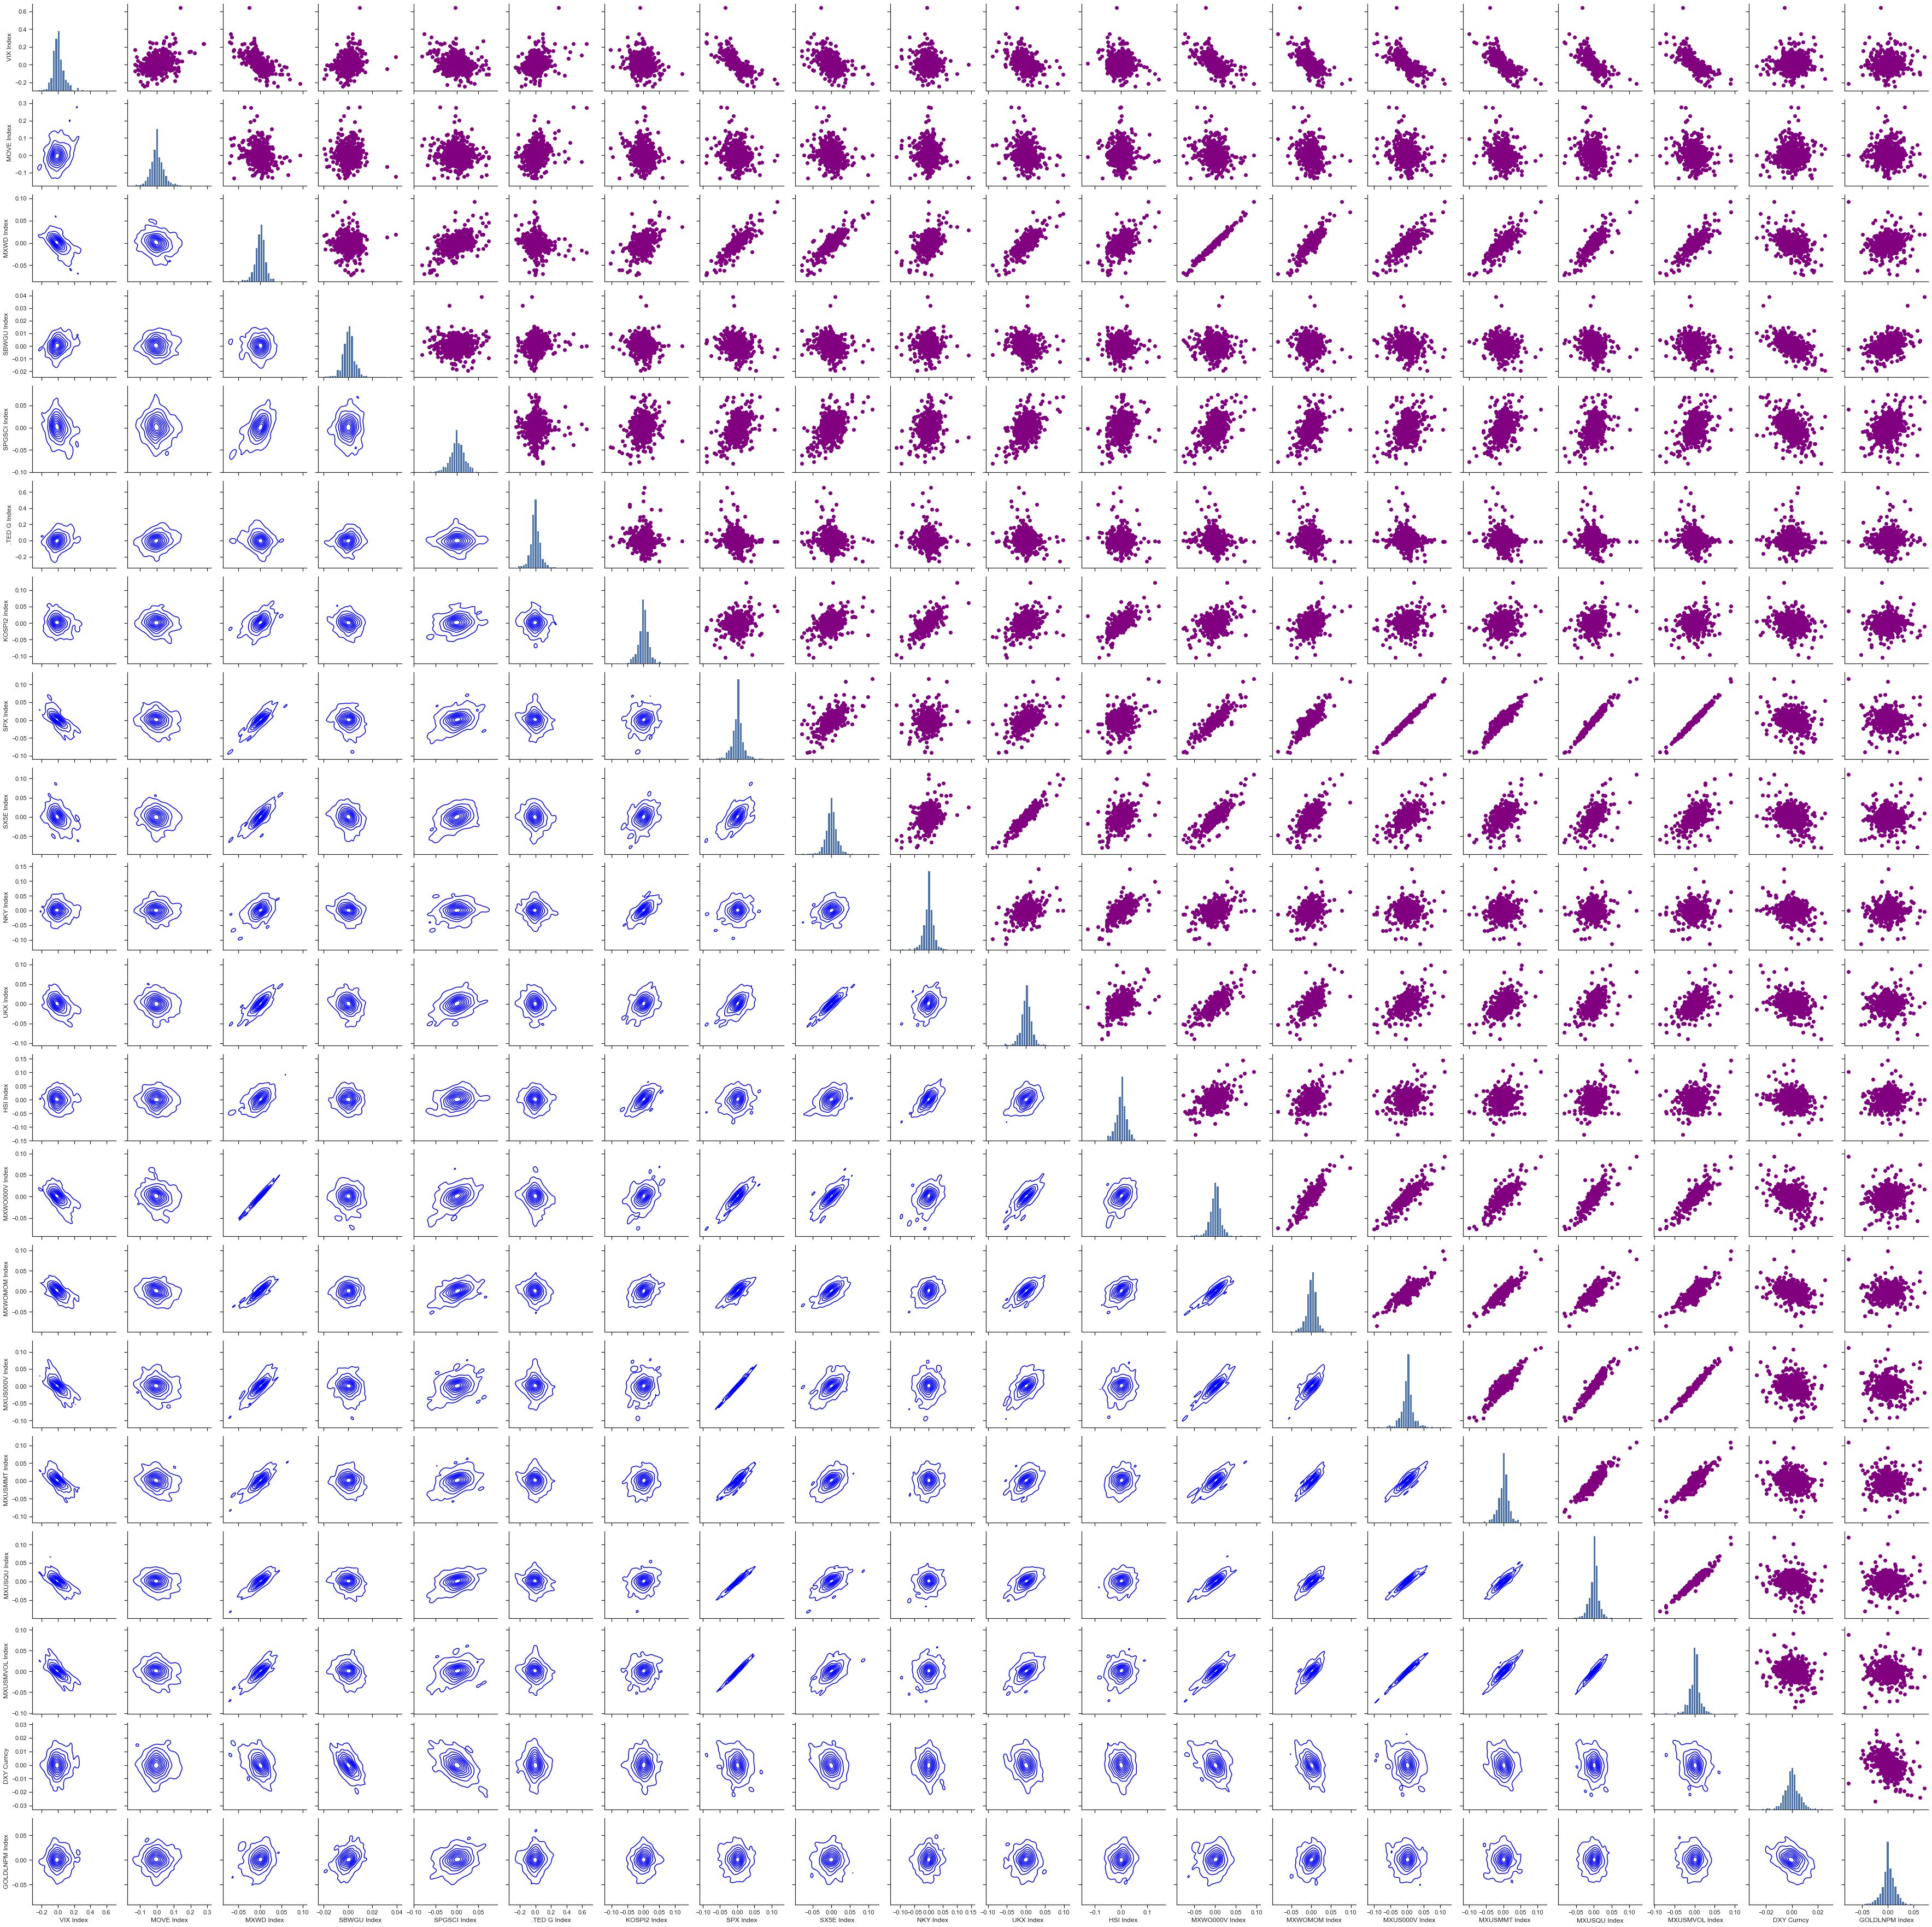

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

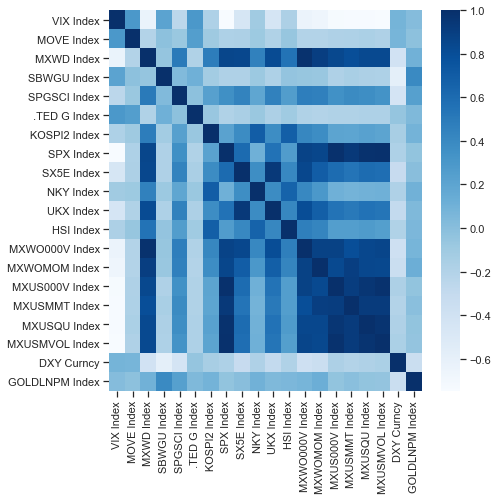

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

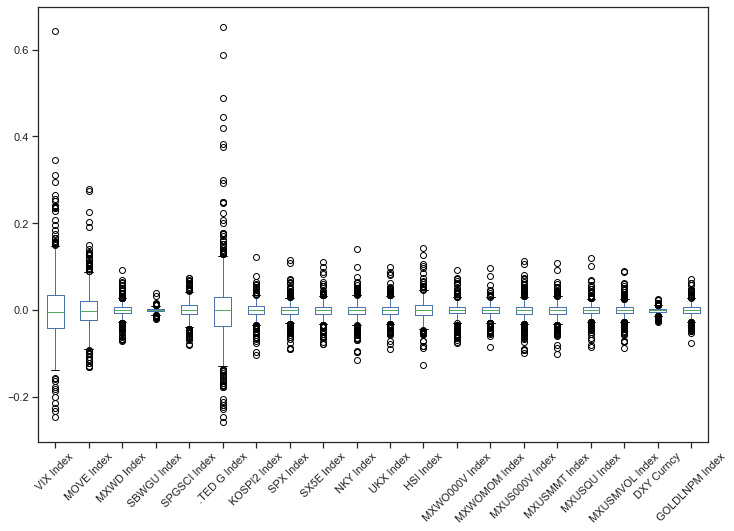

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))
plt.xticks(rotation =45);

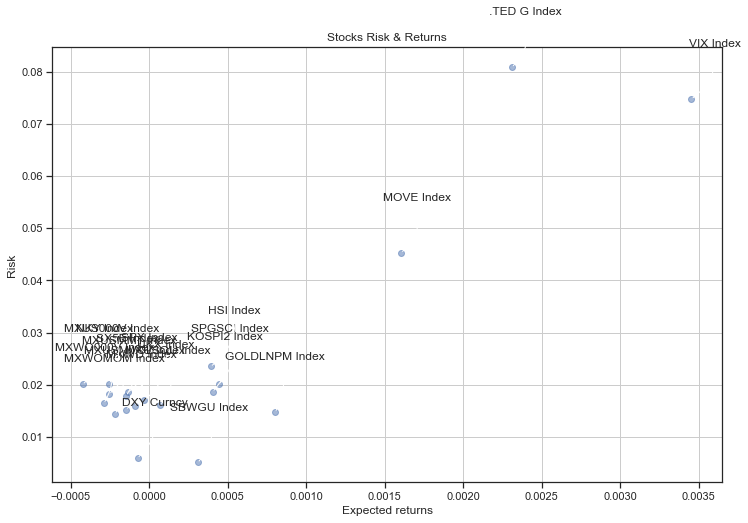

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

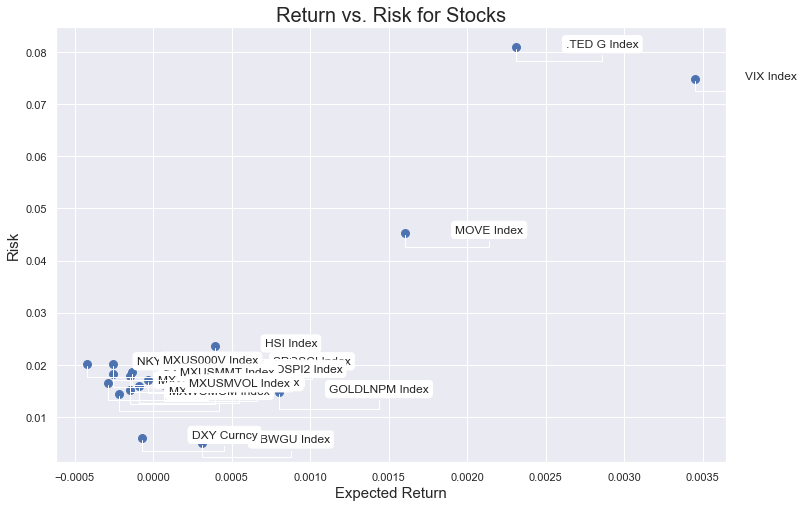

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

VIX Index  MOVE Index  MXWD Index  SBWGU Index  SPGSCI Index  \
Date                                                                       
2007-01-02   0.277660    0.349808    0.480763     0.419257      0.497431   
2007-01-03   0.324367    0.439746    0.408580     0.249861      0.298408   
2007-01-04   0.228143    0.358447    0.409142     0.277785      0.335710   
2007-01-05   0.339230    0.164601    0.371120     0.267895      0.537190   
2007-01-08   0.264687    0.208287    0.436079     0.355598      0.527250   

            .TED G Index  KOSPI2 Index  SPX Index  SX5E Index  NKY Index  \
Date                                                                       
2007-01-02      0.188587      0.465252   0.438272    0.497265   0.446317   
2007-01-03      0.266400      0.372630   0.432457    0.425085   0.446317   
2007-01-04      0.321058      0.418659   0.444230    0.404082   0.475356   
2007-01-05      0.255280      0.422975   0.408757    0.355966   0.387223   
2007-01-08      0.249856      0.407850   0.449042    0.409613   0.446317   

            UKX Index  HSI Index  MXWO000V Index  MXWOMOM Index  \
Date                                                              
2007-01-02   0.551028   0.533528        0.493746       0.503746   
2007-01-03   0.480394   0.488341        0.431559       0.422697   
2007-01-04   0.446428   0.399313        0.426381       0.432032   
2007-01-05   0.416586   0.503838        0.387524       0.396564   
2007-01-08   0.451245   0.436329        0.453390       0.470380   

            MXUS000V Index  MXUSMMT Index  MXUSQU Index  MXUSMVOL Index  \
Date                                                                      
2007-01-02        0.468996       0.479670      0.412539        0.485948   
2007-01-03        0.463189       0.476273      0.404396        0.479723   
2007-01-04        0.459934       0.480088      0.434212        0.482282   
2007-01-05        0.437114       0.441448      0.386668        0.449816   
2007-01-08        0.473434       0.495376      0.425076        0.497301   

            DXY Curncy  GOLDLNPM Index  
Date                                    
2007-01-02    0.426446        0.602896  
2007-01-03    0.662047        0.549938  
2007-01-04    0.608604        0.373005  
2007-01-05    0.580982        0.312582  
2007-01-08    0.497338        0.519722

In [22]:
Normalized_Value.corr()

VIX Index  MOVE Index  MXWD Index  SBWGU Index  SPGSCI Index  \
VIX Index        1.000000    0.290525   -0.637068     0.213781     -0.254088   
MOVE Index       0.290525    1.000000   -0.203844    -0.019673     -0.073370   
MXWD Index      -0.637068   -0.203844    1.000000    -0.055783      0.504162   
SBWGU Index      0.213781   -0.019673   -0.055783     1.000000      0.036797   
SPGSCI Index    -0.254088   -0.073370    0.504162     0.036797      1.000000   
.TED G Index     0.290651    0.255637   -0.189181     0.111113     -0.020183   
KOSPI2 Index    -0.178906   -0.097961    0.487490    -0.115285      0.230809   
SPX Index       -0.747313   -0.176840    0.849984    -0.186982      0.357020   
SX5E Index      -0.454590   -0.169654    0.846747    -0.183626      0.442736   
NKY Index       -0.105924   -0.089995    0.458273    -0.080511      0.190637   
UKX Index       -0.445762   -0.189029    0.819094    -0.179326      0.456057   
HSI Index       -0.167741   -0.058933    0.546991    -0.047548      0.257656   
MXWO000V Index  -0.643649   -0.204741    0.985832    -0.064349      0.477358   
MXWOMOM Index   -0.661880   -0.202973    0.900625    -0.068851      0.467070   
MXUS000V Index  -0.730591   -0.181286    0.837412    -0.186131      0.347575   
MXUSMMT Index   -0.734630   -0.179954    0.797730    -0.149541      0.385985   
MXUSQU Index    -0.737448   -0.166599    0.835659    -0.173114      0.370522   
MXUSMVOL Index  -0.744282   -0.182116    0.829642    -0.180091      0.331322   
DXY Curncy       0.080246    0.075336   -0.409680    -0.583185     -0.438231   
GOLDLNPM Index   0.014659   -0.022565    0.104990     0.398709      0.239515   

                .TED G Index  KOSPI2 Index  SPX Index  SX5E Index  NKY Index  \
VIX Index           0.290651     -0.178906  -0.747313   -0.454590  -0.105924   
MOVE Index          0.255637     -0.097961  -0.176840   -0.169654  -0.089995   
MXWD Index         -0.189181      0.487490   0.849984    0.846747   0.458273   
SBWGU Index         0.111113     -0.115285  -0.186982   -0.183626  -0.080511   
SPGSCI Index       -0.020183      0.230809   0.357020    0.442736   0.190637   
.TED G Index        1.000000     -0.070818  -0.188902   -0.154112  -0.078133   
KOSPI2 Index       -0.070818      1.000000   0.217892    0.384436   0.697010   
SPX Index          -0.188902      0.217892   1.000000    0.603169   0.109970   
SX5E Index         -0.154112      0.384436   0.603169    1.000000   0.368553   
NKY Index          -0.078133      0.697010   0.109970    0.368553   1.000000   
UKX Index          -0.170434      0.373285   0.556194    0.933590   0.380665   
HSI Index          -0.105522      0.685643   0.265355    0.411168   0.654688   
MXWO000V Index     -0.193089      0.416440   0.876319    0.843155   0.407034   
MXWOMOM Index      -0.202013      0.372810   0.855453    0.695164   0.290711   
MXUS000V Index     -0.190153      0.205361   0.990001    0.597060   0.106805   
MXUSMMT Index      -0.191668      0.200617   0.932327    0.538966   0.087446   
MXUSQU Index       -0.178769      0.222083   0.980546    0.595264   0.100654   
MXUSMVOL Index     -0.179827      0.203606   0.988653    0.581373   0.105905   
DXY Curncy         -0.055084     -0.144598  -0.176172   -0.310890  -0.183002   
GOLDLNPM Index      0.043258      0.088434  -0.042161    0.003423   0.105534   

                UKX Index  HSI Index  MXWO000V Index  MXWOMOM Index  \
VIX Index       -0.445762  -0.167741       -0.643649      -0.661880   
MOVE Index      -0.189029  -0.058933       -0.204741      -0.202973   
MXWD Index       0.819094   0.546991        0.985832       0.900625   
SBWGU Index     -0.179326  -0.047548       -0.064349      -0.068851   
SPGSCI Index     0.456057   0.257656        0.477358       0.467070   
.TED G Index    -0.170434  -0.105522       -0.193089      -0.202013   
KOSPI2 Index     0.373285   0.685643        0.416440       0.372810   
SPX Index        0.556194   0.265355        0.876319       0.855453   
SX5E Index     

In [23]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
VIX Index         0.003453
MOVE Index        0.001605
MXWD Index       -0.000147
SBWGU Index       0.000310
SPGSCI Index      0.000446
.TED G Index      0.002310
KOSPI2 Index      0.000404
SPX Index        -0.000136
SX5E Index       -0.000254
NKY Index        -0.000424
UKX Index        -0.000033
HSI Index         0.000392
MXWO000V Index   -0.000288
MXWOMOM Index    -0.000217
MXUS000V Index   -0.000255
MXUSMMT Index    -0.000146
MXUSQU Index      0.000071
MXUSMVOL Index   -0.000091
DXY Curncy       -0.000074
GOLDLNPM Index    0.000802
dtype: float64
--------------------------------------------------
Stock risks:
VIX Index         0.074822
MOVE Index        0.045300
MXWD Index        0.015213
SBWGU Index       0.005084
SPGSCI Index      0.020102
.TED G Index      0.080929
KOSPI2 Index      0.018665
SPX Index         0.018520
SX5E Index        0.018250
NKY Index         0.020109
UKX Index         0.017031
HSI Index         0.023515
MXWO000V Index    0.016471
MXWOMOM Index 

In [24]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

Returns      Risk
NKY Index      -0.000424  0.020109
MXWO000V Index -0.000288  0.016471
MXUS000V Index -0.000255  0.020214
SX5E Index     -0.000254  0.018250
MXWOMOM Index  -0.000217  0.014403
MXWD Index     -0.000147  0.015213
MXUSMMT Index  -0.000146  0.017933
SPX Index      -0.000136  0.018520
MXUSMVOL Index -0.000091  0.015866
DXY Curncy     -0.000074  0.005974
UKX Index      -0.000033  0.017031
MXUSQU Index    0.000071  0.016083
SBWGU Index     0.000310  0.005084
HSI Index       0.000392  0.023515
KOSPI2 Index    0.000404  0.018665
SPGSCI Index    0.000446  0.020102
GOLDLNPM Index  0.000802  0.014760
MOVE Index      0.001605  0.045300
.TED G Index    0.002310  0.080929
VIX Index       0.003453  0.074822

In [25]:
table.sort_values(by='Risk')

Returns      Risk
SBWGU Index     0.000310  0.005084
DXY Curncy     -0.000074  0.005974
MXWOMOM Index  -0.000217  0.014403
GOLDLNPM Index  0.000802  0.014760
MXWD Index     -0.000147  0.015213
MXUSMVOL Index -0.000091  0.015866
MXUSQU Index    0.000071  0.016083
MXWO000V Index -0.000288  0.016471
UKX Index      -0.000033  0.017031
MXUSMMT Index  -0.000146  0.017933
SX5E Index     -0.000254  0.018250
SPX Index      -0.000136  0.018520
KOSPI2 Index    0.000404  0.018665
SPGSCI Index    0.000446  0.020102
NKY Index      -0.000424  0.020109
MXUS000V Index -0.000255  0.020214
HSI Index       0.000392  0.023515
MOVE Index      0.001605  0.045300
VIX Index       0.003453  0.074822
.TED G Index    0.002310  0.080929

In [26]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

Returns      Risk  Sharpe Ratio
VIX Index       0.003453  0.074822     -0.087502
MOVE Index      0.001605  0.045300     -0.185325
MXWD Index     -0.000147  0.015213     -0.666982
SBWGU Index     0.000310  0.005084     -1.905997
SPGSCI Index    0.000446  0.020102     -0.475301
.TED G Index    0.002310  0.080929     -0.095016
KOSPI2 Index    0.000404  0.018665     -0.514127
SPX Index      -0.000136  0.018520     -0.547271
SX5E Index     -0.000254  0.018250     -0.561860
NKY Index      -0.000424  0.020109     -0.518350
UKX Index      -0.000033  0.017031     -0.589106
HSI Index       0.000392  0.023515     -0.408606
MXWO000V Index -0.000288  0.016471     -0.624630
MXWOMOM Index  -0.000217  0.014403     -0.709378
MXUS000V Index -0.000255  0.020214     -0.507329
MXUSMMT Index  -0.000146  0.017933     -0.565778
MXUSQU Index    0.000071  0.016083     -0.617359
MXUSMVOL Index -0.000091  0.015866     -0.636033
DXY Curncy     -0.000074  0.005974     -1.686293
GOLDLNPM Index  0.000802  0.014760     -0.623166

In [27]:
table['Max Returns'] = rets.max()
table['Min Returns'] = rets.min()
table['Median Returns'] = rets.median()

In [28]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
VIX Index       0.003453  0.074822     -0.087502     0.642152    -0.246836   
MOVE Index      0.001605  0.045300     -0.185325     0.278309    -0.131313   
MXWD Index     -0.000147  0.015213     -0.666982     0.093101    -0.071070   
SBWGU Index     0.000310  0.005084     -1.905997     0.039246    -0.019500   
SPGSCI Index    0.000446  0.020102     -0.475301     0.074811    -0.080989   
.TED G Index    0.002310  0.080929     -0.095016     0.652731    -0.257506   
KOSPI2 Index    0.000404  0.018665     -0.514127     0.122319    -0.103295   
SPX Index      -0.000136  0.018520     -0.547271     0.115800    -0.090350   
SX5E Index     -0.000254  0.018250     -0.561860     0.110018    -0.078801   
NKY Index      -0.000424  0.020109     -0.518350     0.141503    -0.114064   
UKX Index      -0.000033  0.017031     -0.589106     0.098388    -0.088493   
HSI Index       0.000392  0.023515     -0.408606     0.143471    -0.127000   
MXWO000V Index -0.000288  0.016471     -0.624630     0.092638    -0.076038   
MXWOMOM Index  -0.000217  0.014403     -0.709378     0.098217    -0.084245   
MXUS000V Index -0.000255  0.020214     -0.507329     0.112670    -0.099513   
MXUSMMT Index  -0.000146  0.017933     -0.565778     0.108504    -0.100025   
MXUSQU Index    0.000071  0.016083     -0.617359     0.119445    -0.083879   
MXUSMVOL Index -0.000091  0.015866     -0.636033     0.091050    -0.086072   
DXY Curncy     -0.000074  0.005974     -1.686293     0.025519    -0.026894   
GOLDLNPM Index  0.000802  0.014760     -0.623166     0.070809    -0.076624   

                Median Returns  Total Return  
VIX Index            -0.003890      8.617234  
MOVE Index           -0.000837      2.969349  
MXWD Index            0.001053     -0.093421  
SBWGU Index           0.000270      0.023230  
SPGSCI Index          0.000000     -0.080565  
.TED G Index          0.000000     -3.378874  
KOSPI2 Index          0.000735      0.000000  
SPX Index             0.000477     -1.004954  
SX5E Index           -0.000080     -0.043152  
NKY Index             0.000000      0.000000  
UKX Index             0.000000      0.278258  
HSI Index             0.000000      1.748554  
MXWO000V Index        0.000704     -0.202651  
MXWOMOM Index         0.000871     -0.411518  
MXUS000V Index        0.000143     -0.916643  
MXUSMMT Index         0.000577     -0.977015  
MXUSQU Index          0.000346     -1.084216  
MXUSMVOL Index        0.000645     -1.023446  
DXY Curncy           -0.000277     -0.069307  
GOLDLNPM Index        0.000528      0.000000